# Milestone 3

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.QuoteBankData import QuoteBankData
from src.Deaths import Deaths
import src.utilities.quotebank_preprocessing_utils as utils
from src.CONSTS import *
from src.utilities.synonym_utils import add_new_synonyms
from src.utilities.utils import *
from src.utilities.plotting import *
import math
import pygal
from pygal.style import Style
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

[nltk_data] Downloading package wordnet to C:\Users\Henrik Øberg
[nltk_data]     Myhre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Quotebank preprocessing

Most of the code used for the quotebank preprocessing can be found in the classes QuotebankData and Keyword, in addition to in files for helper functions. 

Initialize quotebank
- read keyword and synonyms for death causes
- create folders and file names for quotes that matches keywords or synonyms
- match keywords and synonyms with quotes

load database of speakers


In [2]:
quotebank = QuoteBankData("Asymmetry of News", [])
quotebank.read_keywords_from_file()
utils.create_directories_for_every_year()
quotebank.create_json_dumps_filenames_for_each_keyword()

In [3]:
import warnings
import collections

warnings.filterwarnings("ignore")

def save_meta_data_quotes():
    
    quotebank.quotes_occurrences_df = pd.DataFrame()
    for year in range(BEGIN_YEAR, END_YEAR + 1):
        print("Creating meta data for year:", year, "...")
        dict_df_row = {"Year": year}
        
        for key in quotebank.keywords:
            file = key.output_filenames[year-BEGIN_YEAR]
            with open(file, 'rU') as f:
                quotes = pd.read_json(file, lines=True)
                
            dict_df_row[key.name] = 0
            if len(quotes) <= 0: continue
                
            # Save total number of quotes per year per topic in df
            num_of_quotes = quotes["n_appearances"].sum()
            dict_df_row[key.name] = num_of_quotes

            for _, line_quotes in quotes.iterrows():
                # Safe number of quotes per topic per year per country of url
                country_urls = line_quotes['country_urls']
                for country in country_urls:
                    if country == "Great Britain":
                        country = "United Kingdom"
                    if (country, year) in key.country_url_occurences:
                        key.country_url_occurences[(country, year)] += 1
                    else:
                        key.country_url_occurences[(country, year)] = 1

                # Safe number of quotes per topic per year per country of speaker
                country_speaker = line_quotes['country_speaker']
                if country_speaker:
                    if isinstance(country_speaker, list):        # if multiple countries, take most occuring
                        country_speaker = collections.Counter(country_speaker).most_common(1)[0][0]

                    if (country_speaker,year) in key.country_speaker_occurences:
                        key.country_speaker_occurences[(country_speaker,year)] +=1
                    else:
                        key.country_speaker_occurences[(country_speaker,year)] = 1 
            
        quotebank.quotes_occurrences_df = quotebank.quotes_occurrences_df.append(dict_df_row, ignore_index = True)
        cols = quotebank.quotes_occurrences_df.columns
        quotebank.quotes_occurrences_df[cols] = quotebank.quotes_occurrences_df[cols].astype(int)

In [4]:
save_meta_data_quotes()

Creating meta data for year: 2008 ...
Creating meta data for year: 2009 ...
Creating meta data for year: 2010 ...
Creating meta data for year: 2011 ...
Creating meta data for year: 2012 ...
Creating meta data for year: 2013 ...
Creating meta data for year: 2014 ...
Creating meta data for year: 2015 ...
Creating meta data for year: 2016 ...


In [5]:
quotebank.quotes_occurrences_df

,Alzheimer disease and other dementias,Cardiovascular diseases,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Diabetes mellitus,Diarrheal diseases,Digestive diseases,Drowning,Drug use and alcoholism,...,Neonatal disorders,Neoplasms,Nutritional deficiencies,Parkinson disease,Poisonings,Road injuries,Suicide,Tuberculosis,War and terrorism,Year
0,898,4443,166,1059,323,268,784,96,664,801,...,77,9560,298,295,321,5450,5170,189,26126,2008
1,5710,15954,866,4371,1885,1086,929,713,1871,2966,...,302,45527,1192,1631,2789,24223,18223,677,118306,2009
2,7181,16459,961,4636,1786,1211,2724,339,2251,5312,...,384,47871,1746,1339,2664,21684,17032,591,120538,2010
3,6113,16454,893,5058,2326,967,1360,388,1416,2771,...,347,48634,1711,2428,1372,19750,15523,703,129636,2011
4,8138,16448,882,4700,2498,1106,979,579,4569,2464,...,409,52819,1366,2086,1601,33134,15947,700,169723,2012
5,6901,14816,1111,4630,2371,1162,710,714,3268,2574,...,292,48708,1516,2254,4011,20424,13981,632,126723,2013
6,8111,17079,935,5390,2677,1151,750,999,4194,3462,...,480,51747,1567,3101,2008,23257,18049,961,203666,2014
7,9571,17731,1079,6547,3850,1253,900,759,5540,4263,...,420,67033,1456,2351,2612,25836,22176,757,261676,2015
8,8027,13636,1020,3811,2222,1211,1144,510,1692,3965,...,474,40745,1136,1678,2050,16891,17221,401,179159,2016


In [6]:
quotebank.quotes_percentage_df = percentage_of_total_count(quotebank.quotes_occurrences_df, TOPICS)

In [7]:
quotebank.quotes_percentage_df

,Alzheimer disease and other dementias,Cardiovascular diseases,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Diabetes mellitus,Diarrheal diseases,Digestive diseases,Drowning,Drug use and alcoholism,...,Neonatal disorders,Neoplasms,Nutritional deficiencies,Parkinson disease,Poisonings,Road injuries,Suicide,Tuberculosis,War and terrorism,Year
0,0.945691,4.678960,0.174816,1.115242,0.340154,0.282233,0.825637,0.101098,0.699264,0.843540,...,0.081089,10.067715,0.313826,0.310667,0.338048,5.739440,5.444570,0.199037,27.513506,2008
1,1.351575,3.776363,0.204985,1.034630,0.446186,0.257060,0.219897,0.168769,0.442872,0.702062,...,0.071484,10.776386,0.282150,0.386063,0.660165,5.733662,4.313442,0.160248,28.003409,2009
2,1.679153,3.848654,0.224713,1.084049,0.417625,0.283172,0.636961,0.079269,0.526358,1.242120,...,0.089792,11.193810,0.408272,0.313102,0.622931,5.070430,3.982640,0.138195,28.185738,2010
3,1.355847,3.649454,0.198065,1.121851,0.515901,0.214478,0.301644,0.086057,0.314065,0.614600,...,0.076964,10.786893,0.379495,0.538524,0.304306,4.380498,3.442960,0.155924,28.752922,2011
4,1.447419,2.925431,0.156872,0.835939,0.444293,0.196712,0.174124,0.102981,0.812639,0.438245,...,0.072744,9.394353,0.242956,0.371015,0.284753,5.893192,2.836323,0.124502,30.186823,2012
5,1.678708,3.604077,0.270257,1.126274,0.576759,0.282663,0.172712,0.173685,0.794960,0.626140,...,0.071031,11.848500,0.368776,0.548298,0.975699,4.968255,3.400958,0.153738,30.826096,2013
6,1.546086,3.255530,0.178226,1.027420,0.510279,0.219399,0.142962,0.190425,0.799443,0.659913,...,0.091496,9.863805,0.298695,0.591100,0.382757,4.433156,3.440428,0.183182,38.821993,2014
7,1.481696,2.744954,0.167041,1.013548,0.596022,0.193978,0.139330,0.117502,0.857653,0.659959,...,0.065021,10.377445,0.225405,0.363961,0.404366,3.999697,3.433088,0.117192,40.510319,2015
8,1.859901,3.159539,0.236340,0.883030,0.514850,0.280596,0.265071,0.118170,0.392046,0.918713,...,0.109828,9.440848,0.263218,0.388802,0.474997,3.913741,3.990203,0.092914,41.512158,2016


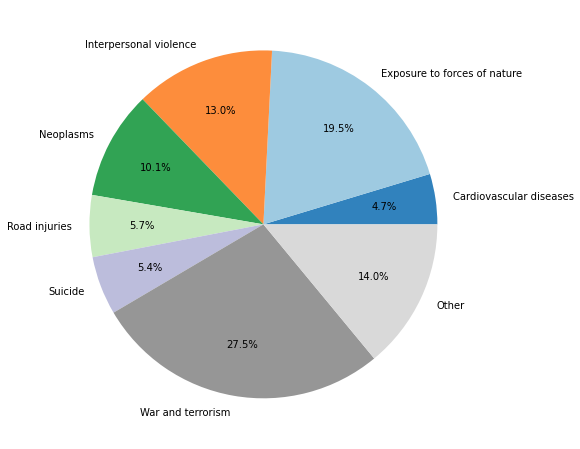

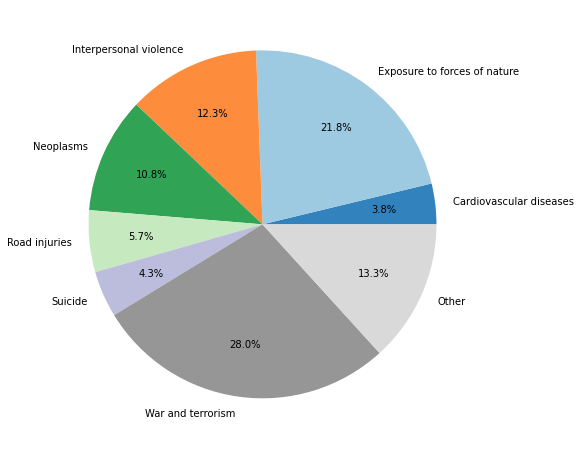

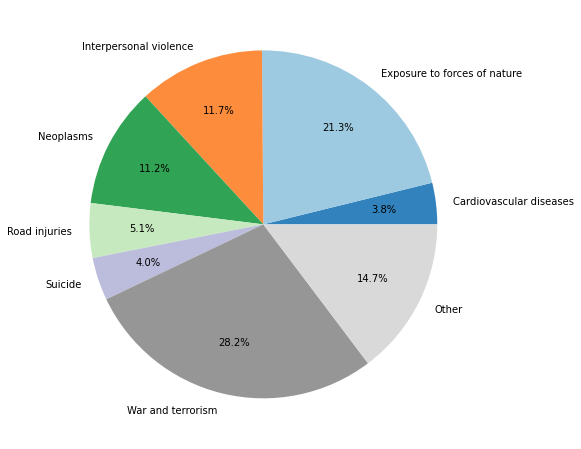

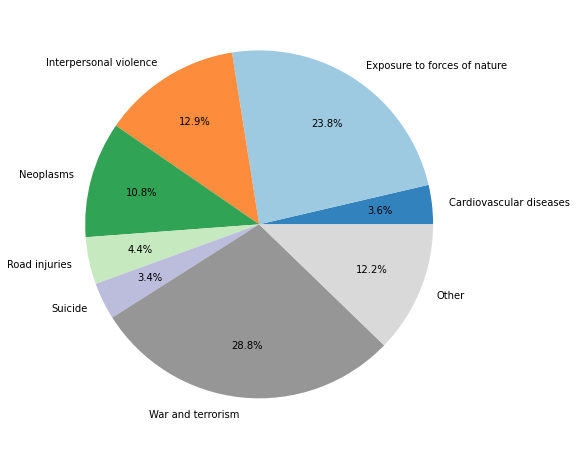

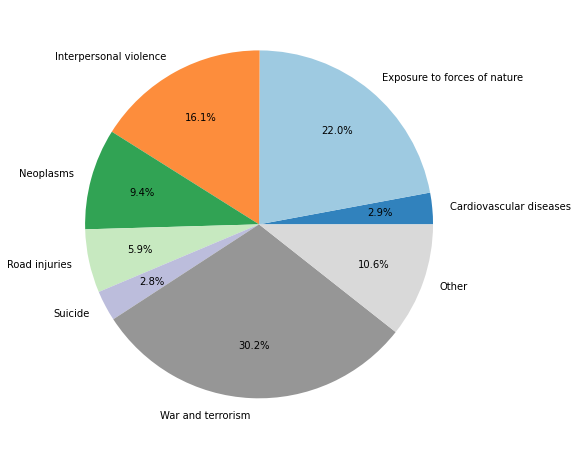

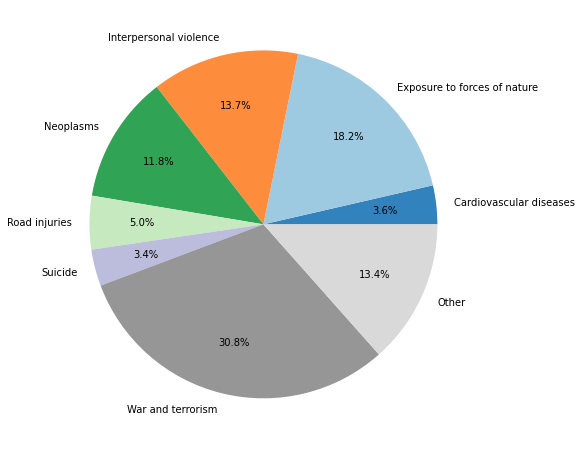

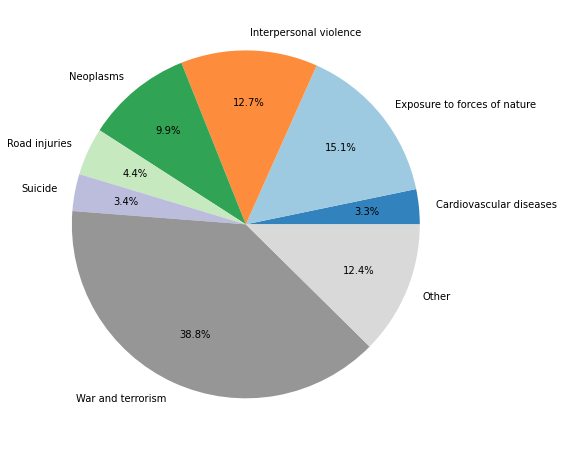

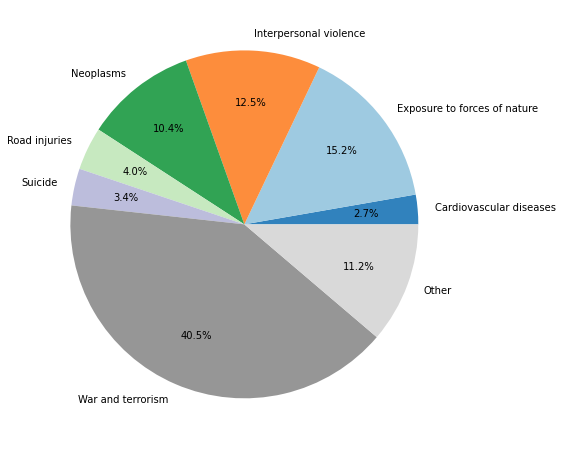

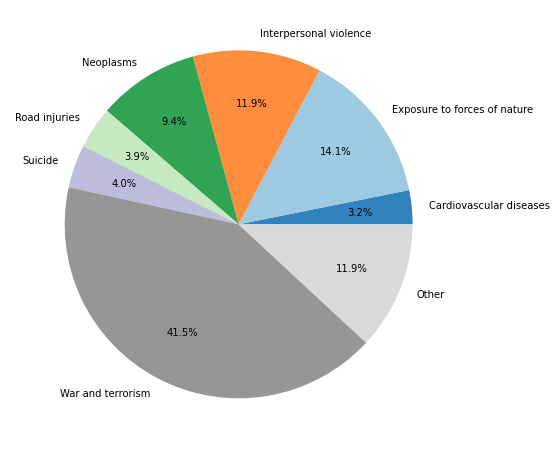

In [8]:
for y in range(BEGIN_YEAR, END_YEAR + 1):
    cause_pie_chart_plot(quotebank.quotes_percentage_df, y, 7)

In [9]:
quotebank.map_df_causes_to_categories()

In [10]:
quotebank.cat_quotes_occurrences_df

,Year,Injuries,Non-communicable diseases,Communicable diseases
0,2008,69434.0,17108.0,8415.0
1,2009,312619.0,77743.0,32108.0
2,2010,312541.0,81783.0,33332.0
3,2011,336676.0,83261.0,30925.0
4,2012,442479.0,89256.0,30507.0
5,2013,302884.0,82667.0,25539.0
6,2014,400922.0,91190.0,32503.0
7,2015,501442.0,110174.0,34333.0
8,2016,334247.0,72860.0,24475.0


In [11]:
quotebank.cat_quotes_percentage_df = percentage_of_total_count(quotebank.cat_quotes_occurrences_df, CATEGORIES)

In [12]:
quotebank.cat_quotes_percentage_df

,Year,Injuries,Non-communicable diseases,Communicable diseases
0,2008,73.121518,18.016576,8.861906
1,2009,73.997917,18.402017,7.600066
2,2010,73.082337,19.123548,7.794115
3,2011,74.673847,18.467070,6.859083
4,2012,78.699030,15.875015,5.425955
5,2013,73.678270,20.109222,6.212508
6,2014,76.422138,17.382271,6.195591
7,2015,77.628729,17.056145,5.315125
8,2016,77.446928,16.882076,5.670996


# Country preprocessing

In [13]:
num_url_country = 0
num_speaker_country = 0
for i in range(len(quotebank.keywords)):   
    for key in quotebank.keywords[i].country_url_occurences:
        num_url_country += quotebank.keywords[i].country_url_occurences[key]
    for key in quotebank.keywords[i].country_speaker_occurences:
        num_speaker_country += quotebank.keywords[i].country_speaker_occurences[key]
        
total_quotes = quotebank.quotes_occurrences_df.sum().sum()
print("Percentage of country of url found: {:.4f}".format(num_url_country/total_quotes))
print("Percentage of country of speaker found: {:.4f}".format(num_speaker_country/total_quotes))

Percentage of country of url found: 0.9955
Percentage of country of speaker found: 0.2737


In [14]:
def get_quote_occurences_per_country_year(url_or_speaker):
    """This function returns the number of quotes from a country per year, based on speaker or url.
    param: url_or_speaker: str
    return: totals_per_country: dict, keys are like (country,year)"""
    
    # Check value
    if url_or_speaker != "url" and url_or_speaker != "speaker":
        raise ValueError("Did not choose url or speaker")
    
    # Safe variable
    totals_per_country = dict()
    # Get occurences form url from countries
    if url_or_speaker == "url":
        for i in range(len(quotebank.keywords)):   
            for key in quotebank.keywords[i].country_url_occurences:
                if key in totals_per_country:
                    totals_per_country[key] += quotebank.keywords[i].country_url_occurences[key]
                else:
                    totals_per_country[key] = quotebank.keywords[i].country_url_occurences[key]
    # Get occurences of speakers from countries              
    elif url_or_speaker == "speaker":
        for i in range(len(quotebank.keywords)):   
            for key in quotebank.keywords[i].country_speaker_occurences:
                if key in totals_per_country:
                    totals_per_country[key] += quotebank.keywords[i].country_speaker_occurences[key]
                else:
                    totals_per_country[key] = quotebank.keywords[i].country_speaker_occurences[key]
    
    return totals_per_country

def get_country_a2_code(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown'  
    return cn_a2_code

def map_countries_according_to_mag_order(totals_per_country, year):
    """Creates a mapping dict for the occurences of quotes according to order of magintude.
    Out put is a list of dicts, with first dict for countries for which between 10^0 and 
    10^1 quotes were found, etc.
    param: totals_per_country: dict
            year: int
            
    return: mapping: list of dicts"""
    
    c_code = list()
    countries = totals_per_country.keys()
    quotes = list()
    for country_year in countries:
        if country_year[1] == year:
            quotes.append(totals_per_country[country_year])
            cn_a2_code = get_country_a2_code(country_year[0])
            c_code.append(cn_a2_code)
    
    all_countries_code = ALL_COUNTRIES_CODE.copy()
    mapping = [dict() for i in range(7)]
    for i, code in enumerate(c_code):
        s_code = code.lower()
        if s_code in all_countries_code:
            all_countries_code.remove(s_code)
        if s_code != 'unknown':
            quote_order = np.log(quotes[i])/np.log(10)
            if quote_order < 1:
                mapping[1][s_code] = 1
            elif quote_order < 2:
                mapping[2][s_code] = 1
            elif quote_order < 3:
                mapping[3][s_code] = 1
            elif quote_order < 4:
                mapping[4][s_code] = 1
            elif quote_order < 5:
                mapping[5][s_code] = 1
            elif quote_order < 6:
                mapping[6][s_code] = 1
    # No data countries
    for country in all_countries_code:
        mapping[0][country] = 1

    return mapping

def create_world_map(mapping, safe_name, year):
    custom_style = Style(colors=('#D3D3D3','#4FFFFF','#00C9E4','#0094C2','#006198','#003269','#000036'))

    # create a world map
    worldmap =  pygal.maps.world.World(style=custom_style, show_legend=False)


    # adding the countries
    worldmap.add("No Data", mapping[0])
    for i in range(1,len(mapping)):
        if mapping[i].keys():
            worldmap.add(str("{:0.0f}-{:0.0f}".format(i-1,i)), mapping[i])

    worldmap.render_to_file(GENERATED_IMAGES_PATH + safe_name + '.svg')

In [15]:
# Create Maps for all years for speaker and url and safes them in data/images/year_(url/speaker)_country_occurences.svg
url_speaker = ["url","speaker"]
for target in url_speaker:
    for year in range(2008,2017):
        totals_per_country = get_quote_occurences_per_country_year(target)
        mapping = map_countries_according_to_mag_order(totals_per_country, year)
        create_world_map(mapping, str(year) + "_" + target + "_country_occurences", year)

AttributeError: module 'pygal.maps' has no attribute 'world'

In [ ]:
def get_country_per_year_count(url_or_speaker, countries, year, percentage = False):
    # Check value
    if url_or_speaker != "url" and url_or_speaker != "speaker":
        raise ValueError("Did not choose url or speaker")
    
    # Initialize output
    topic_appearance_country = np.zeros((len(quotebank.keywords), len(countries)+1)) # Last column for rest of the world
    topics = list()
    for i in range(len(quotebank.keywords)):
        topics.append(quotebank.keywords[i].name)
        if url_or_speaker == "url":
            for key in quotebank.keywords[i].country_url_occurences:
                if key[0] in countries and key[1] == year:
                    topic_appearance_country[i, countries.index(key[0])] = quotebank.keywords[i].country_url_occurences[key]
                elif key[0] is not None and key[1] == year:
                    topic_appearance_country[i, -1] += quotebank.keywords[i].country_url_occurences[key] # rest of the World
                    
        elif url_or_speaker == "speaker":
            for key in quotebank.keywords[i].country_speaker_occurences:
                if key[0] in countries and key[1] == year:
                    topic_appearance_country[i, countries.index(key[0])] = quotebank.keywords[i].country_speaker_occurences[key]
                elif key[0] is not None and key[1] == year:
                    topic_appearance_country[i, -1] += quotebank.keywords[i].country_speaker_occurences[key] # rest of the World
        
    # Make into DataFrame
    topic_appearance_country = np.transpose(topic_appearance_country)
    topic_appearance_country = pd.DataFrame(data = topic_appearance_country,
                                           columns = topics)
    
    return topic_appearance_country

def reduce_df(df_original, percentage_treshold, return_percentage = False):
    df = df_original.copy()
    df_percentage = df.copy()
    # Check if rows are percentages
    if int(df_percentage.iloc[0].sum()) != 100:
        for index, row in df_percentage.iterrows():
            df_percentage.iloc[index] = (row/row.sum()) * 100
        
    other = np.zeros(len(df))
    other_percentage = np.zeros(len(df))
    for column in df:
        if df_percentage[column].max() < percentage_treshold:
            other += df[column].values
            other_percentage += df_percentage[column].values
            df.drop([column], axis=1, inplace=True)
            df_percentage.drop([column], axis=1, inplace=True)
            
    df = df.assign(Other=other)
    df_percentage = df_percentage.assign(Other=other_percentage)

    if not return_percentage:
        return df
    else:
        return df_percentage

In [ ]:
countries = ['United Kingdom', 'United States of America','Canada', 'Australia', 'India', 'Pakistan', 'France','South Africa']
for year in range(2008,2017):
    if year == 2008:
        totals_per_country = get_country_per_year_count('url', countries, year)
    else:
        totals_per_country = totals_per_country + get_country_per_year_count('url', countries, year)
        
df_reduce = reduce_df(totals_per_country, 5, return_percentage = True)
countries.append('Rest of the World')
stacked_barplot(df_reduce, x_labels=countries, y_label= "", title=None,
                width = 0.35, safe_name='country_specific_quote_url_percentage', log_y=False)

In [ ]:
df_reduce = reduce_df(totals_per_country, 5, return_percentage = False)
countries.append('Rest of the World')
stacked_barplot(df_reduce, x_labels=countries, y_label= "Occurences (log)", title=None,
                width = 0.35, safe_name='country_specific_quote_url_log', log_y=True)

In [ ]:
countries = ['United Kingdom', 'United States of America','Canada', 'Australia', 'India', 'Pakistan', 'France','South Africa']
for year in range(2008,2017):
    if year == 2008:
        totals_per_country = get_country_per_year_count('speaker', countries, year)
    else:
        totals_per_country = totals_per_country + get_country_per_year_count('speaker', countries, year)
        
df_reduce = reduce_df(totals_per_country, 5, return_percentage = True)
countries.append('Rest of the World')
stacked_barplot(df_reduce, x_labels=countries, y_label= "Percentage", title=None,
                width = 0.35, safe_name='country_specific_quote_speaker_percentage', log_y=False)

In [ ]:
df_reduce = reduce_df(totals_per_country, 5, return_percentage = False)
countries.append('Rest of the World')
stacked_barplot(df_reduce, x_labels=countries, y_label= "Percentage", title=None,
                width = 0.35, safe_name='country_specific_quote_speaker_log', log_y=True)

In [ ]:
def get_data_for_one_year(deaths, year):
    """
    Creates a dataframe, where each row represents a region, which is and each column a deathcause.
    Data is taken from deaths, a dict where each keyword is a region, where the value is the data for all years.
    param: deaths: dict
           year: int
           
    return: deaths_year: pd.DataFrame
            deaths_year_percentage: pd.DataFrame (percentage values)
    """
    deaths_year = pd.DataFrame()
    regions = list()
    for region in deaths:
        regions.append(region)
        deaths_year = deaths_year.append(deaths[region][TOPICS][deaths[region]["Year"] == year])
    
    # Get relative values for each year by calculating percentage
    deaths_year = deaths_year.reset_index()
    deaths_year_percentage = deaths_year.copy()
    for i in range(len(deaths_year)):
        deaths_year_percentage.loc[i] = deaths_year_percentage.loc[i]/deaths_year_percentage.loc[i].sum()*100

    return deaths_year, deaths_year_percentage, regions

In [ ]:
deaths = dict()
for region in REGIONS:
    df = Deaths("deaths_by_cause", region, DEATH_BY_CAUSE_PATH, rename_cols = RENAME_CAUSE_COLS, drop_cols = DROP_CAUSE_COLS).df
    for main_region in MAIN_REGIONS:
        if region in MAIN_REGIONS[main_region]:
            if main_region in deaths:
                deaths[main_region] += df.fillna(0)
                deaths[main_region]["Year"] = deaths[main_region]["Year"]/2
            else:
                deaths[main_region] = df.fillna(0)

In [ ]:
# Sum causes for all years together
for year in range(2008,2016):
    deaths_year, _, labels = get_data_for_one_year(deaths, year)
    if year == 2008:
        all_deaths = deaths_year
    else:
        all_deaths = all_deaths + deaths_year
# plot relative number of deaths
all_deaths_reduced = reduce_df(all_deaths, percentage_treshold = 5, return_percentage = True)
stacked_barplot(all_deaths_reduced, x_labels = labels,
                y_label= "Percentage", safe_name="deaths_world_regions", log_y=False)

# plot absolute number of deaths
all_deaths_reduced = reduce_df(all_deaths, percentage_treshold = 5, return_percentage = False)
stacked_barplot(all_deaths_reduced, x_labels = labels,
                y_label="Percentage", safe_name="absolute_deaths_world_regions", log_y=True)

# Our World in Data preprocessing

### Deaths by cause

In [ ]:
death_by_cause_path = DATA_PATH + "annual_number_of_deaths_by_cause.csv"
deaths_by_cause = Deaths("deaths_by_cause", "World", death_by_cause_path, rename_cols = RENAME_CAUSE_COLS, drop_cols = DROP_CAUSE_COLS)
deaths_by_cause.df

In [ ]:
deaths_by_cause.percentage_df

### Deaths by category

In [ ]:
death_by_category_path = DATA_PATH + "categorized_annual_number_of_deaths.csv"
deaths_by_category = Deaths("deaths_by_category",'World', death_by_category_path, rename_cols = RENAME_CAT_COLS)
deaths_by_category.df

In [ ]:
deaths_by_category.percentage_df

## Plotting

### Deaths by cause

In [ ]:
deaths_by_cause.plot_stacked_areas()

In [ ]:
for y in range(2008, 2017):
    cause_pie_chart_plot(deaths_by_cause.percentage_df, y, 7)

### Deaths by category

In [ ]:
deaths_by_category.plot_stacked_areas()

# RQ1

In [ ]:
def get_summed_values(df, cols):
    values = []
    for col in cols:
        values.append(df[col].sum())
    return np.array(values)


def create_RQ1_df():
    causes = deaths_by_cause.quant_columns
    
    summed_death_values = get_summed_values(deaths_by_cause.df, causes)
    summed_quote_values = get_summed_values(quotebank.quotes_occurrences_df, causes)
    
    quotes_per_death = np.divide(summed_quote_values, summed_death_values/1000000)
    
    df = pd.DataFrame(columns=causes)

    for i, cause in enumerate(causes):
        df.at[0, cause] = quotes_per_death[i]
    
    return df


def plot_RQ1(log = True):
    
    df = create_RQ1_df()

    df = df.T
    value_col = list(df.columns)[0]
    df = df.sort_values([value_col], ascending=False)
    
    ax = plt.gca()
    df.plot.barh(figsize=(12,12), log=log, title=None, ax=ax, xlabel=None, ylabel=None, color="#006198", legend=None, xlim = (10**2,10**6))
    
    # Remove border top and right
    for line in ['top', 'right']:
        ax.spines[line].set_visible(False)
    
    # Remove y Ticks
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    
    # Add x, y gridlines
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.6,
            alpha = 0.2)
        
    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.4,
                 ' ' + pretty_num_string(int(i.get_width())),
                 fontsize = 10, fontweight ='bold',
                 color ="#777777")
        
    save_plt("quotes_per_million_deaths")
    plt.show()    

In [ ]:
plot_RQ1()

# RQ2

In [ ]:
from mpl_toolkits.axes_grid1 import host_subplot
COLORS = ["003F5C", "2F4B7C", "665191", "A05195", "D45087", "F95D6A", "FF7C43", "FF600"]
COLOR_MAP = plt.get_cmap('tab20c')

def plot_actual_vs_quote_per_year(d_c_actual, df_a, df_q, x_label, y_label_1, y_label_2, year_list = list(range(BEGIN_YEAR, END_YEAR +1))):
    
    quote_occurences = list()
    actual_occurences = list()
    
    for year in year_list:
        quote_occurences.append(df_q.loc[df_q['Year'] == year][d_c_actual].values)
        actual_occurences.append(df_a.loc[df_a['Year'] == year][d_c_actual].values)
        
    host = host_subplot(111)
    par = host.twinx()

    host.set_xlabel(x_label)
    host.set_ylabel(y_label_1)
    par.set_ylabel(y_label_2)

    p1, = host.plot(year_list, quote_occurences, label=y_label_1)
    p2, = par.plot(year_list, actual_occurences, label=y_label_2)

    leg = plt.legend()

    host.yaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.yaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())
    
    plt.xticks(year_list)
    plt.savefig('./generated/images/double_line_' + d_c_actual.replace("/", "_") + '.png') 
    plt.show()


In [ ]:
for cause in TOPICS:
    print(cause)
    plot_actual_vs_quote_per_year(cause, deaths_by_cause.percentage_df, quotebank.quotes_percentage_df,
    "Year", "Quotebank", "Actual deaths")

In [ ]:
for category in CATEGORIES:
    plot_actual_vs_quote_per_year(category, deaths_by_category.percentage_df, quotebank.cat_quotes_percentage_df,
        "Year", "Quotebank", "Actual deaths")

# RQ5

In [ ]:
def plot_RQ5():
    index = ["Quotes", "Deaths"]
    width = 0.4
    
    value_dict = {}

    for column in deaths_by_category.quant_columns:
        value_dict[column] = [quotebank.cat_quotes_percentage_df[column].sum(), 
                  deaths_by_category.percentage_df[column].sum()]


    df = pd.DataFrame({INJURIES: value_dict[INJURIES], 
                       NON_COMMUNICABLE_DISEASES: value_dict[NON_COMMUNICABLE_DISEASES], 
                       COMMUNICABLE_DISEASES: value_dict[COMMUNICABLE_DISEASES]}, 
                       index=index)
    df = percentage_of_total_count(df, CATEGORIES)

    ax = df.plot.bar(stacked=True, colormap=COLOR_MAP)
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5))
    
    ax.set_ylabel('')
    
    save_plt("RQ5")

    plt.show()

In [ ]:
plot_RQ5()